In [160]:
import numpy as np
import matplotlib.pyplot as plt

In [161]:
def predict(x, weight):
    return np.dot(x, weight)

In [162]:
def  loss_function(weight, x, y):
    m = len(y)

    predicted_values = predict(x, weight)
    loss = (1 / (2 * m)) * np.sum((predicted_values - y) ** 2)
    return loss

In [163]:

def gradient_descent(x ,y, weight, alpha=0.01,
                     iterations=100, tolerance=0.01, print_epoch=True):
    m = len(y)
    loss_history = np.zeros(iterations)
    weight_history = np.zeros((iterations, 2))

    for iteration in range(iterations):
        prediction = predict(x, weight)
        old_weight = weight
        weight = old_weight - (alpha / m) * np.dot(x.T, prediction - y)

        weight_history[iteration, :] = weight.T
        loss_history[iteration]  = loss_function(weight, x, y)

        if all([np.abs(old_weight[0][0] - weight[0][0]) <= tolerance,
                np.abs(old_weight[1][0] - weight[1][0]) <= tolerance]):
            print(f"Stopped at {iteration} iteration")
            loss_history = loss_history[np.where(loss_history != 0)]
            weight_history = weight_history[~np.all(weight_history == 0, axis=1)]
            break

        if print_epoch:
            print(f"Epoch {iteration}: [w0 = %.3f\tw1 = %.3f]\t"
                  f"Loss = %.2f" % (weight[0][0], weight[1][0],
                                    loss_history[iteration]))

    return weight, loss_history, weight_history

In [164]:
def main():
    alpha = 0.1
    tolerance = 0.0001
    iterations = 10000
    weight = np.random.randn(2, 1)

    data_train = np.genfromtxt('lab_1_train.csv', delimiter=',')[1:]
    x_train = data_train[:, [1]]
    X_train = np.c_[np.ones((len(x_train), 1)), x_train]
    y_train = data_train[:, [2]]
    plt.scatter(x_train, y_train, marker = '.')
    plt.show()

    data_test = np.genfromtxt('lab_1_test.csv', delimiter=',')[1:]
    x_test = data_test[:, [1]]
    X_test = np.c_[np.ones((len(x_test), 1)), x_test]
    y_test = data_test[:, [2]]

    weight, loss_history, weight_history = gradient_descent(
        X_train, y_train, weight, iterations=iterations, alpha=alpha, tolerance=tolerance, print_epoch=False
    )

    print(f"w0 = {weight[0][0]}\tw1 = {weight[1][0]}")
    y_predicted = predict(X_test, weight)
    print(f"Loss function: {loss_function(weight, X_test, y_test)}")

    plt.scatter(x_test, y_test, marker = '.')
    plt.plot(x_test, y_predicted, color = 'red')
    plt.show()

    x = np.concatenate((x_train, x_test))
    y = np.concatenate((y_train, y_test))
    y_train_predicted = predict(X_train, weight)

    plt.scatter(x, y, marker = '.')
    plt.plot(x_test, y_predicted, color = 'red')
    plt.plot(x_train, y_train_predicted, color = 'orange')
    plt.show()

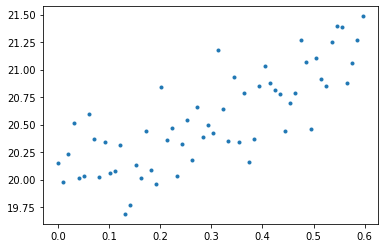

Stopped at 1666 iteration
w0 = 19.949037425573042	w1 = 2.014299238494212
Loss function: 0.03714971035864614


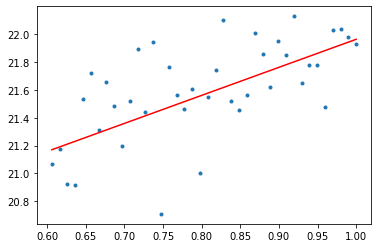

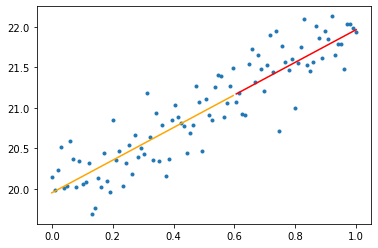

In [165]:
main()